<a href="https://www.kaggle.com/code/hodanaz/student-test-score-what-s-up?scriptVersionId=178797620" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/students-exam-scores/Original_data_with_more_rows.csv
/kaggle/input/students-exam-scores/Expanded_data_with_more_features.csv


# 1. About the data

This dataset includes scores from three test scores of students at a (**fictional**) public school and a variety of personal and socio-economic factors that may have interaction effects upon them.



#### Data dictionary

The following are the column descriptions. Columns 0 to 5 and 11 to 13 are common to both files. The rest are present to the extended file only.

* Gender: gender of the student (male/female)
* EthnicGroup: ethnic group of the student (group A to E)
* ParentEduc: parent(s) education background
* LunchType: school luch type (standard or free/reduced)
* TestPrep: test preparation course (completed or none)
* ParentMaritalStatus: parent(s) marital status
* PracticeSport: how often the student parctice sport
* IsFirstChild: if the child is first child in the family or not
* NrSiblings : Number of siblings the student has
* TransportMeans: Means of transport to school

The above is taken from `@desalegngeb`'s notebook on the same dataset and a few of the cells were taken from them as well.

# 2. Introducing the dataset

In [2]:
#import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')


sns.reset_defaults() #reset to default


In [3]:
data = pd.read_csv("/kaggle/input/students-exam-scores/Expanded_data_with_more_features.csv")

In [4]:
data.head(10)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


In [5]:
#remove unnecessary
data.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [7]:
#convert float type to integer
data['NrSiblings'] = data['NrSiblings'].astype(pd.Int64Dtype())

In [8]:
print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns")

Dataset has 30641 rows and 14 columns


In [9]:
print("features with numerical data types: ",'\n',
      data.select_dtypes(include=np.number).columns,'\n\n\n')


print("features with categorical data types: ",'\n',
      data.select_dtypes(exclude=np.number).columns)


features with numerical data types:  
 Index(['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore'], dtype='object') 



features with categorical data types:  
 Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'TransportMeans', 'WklyStudyHours'],
      dtype='object')


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
NrSiblings,29069.0,2.145894,1.458242,0.0,1.0,2.0,3.0,7.0
MathScore,30641.0,66.558402,15.361616,0.0,56.0,67.0,78.0,100.0
ReadingScore,30641.0,69.377533,14.758952,10.0,59.0,70.0,80.0,100.0
WritingScore,30641.0,68.418622,15.443525,4.0,58.0,69.0,79.0,100.0


## Duplicated Data

In [11]:
data.duplicated().sum()

#no duplicate values

0

## Missing value imputation

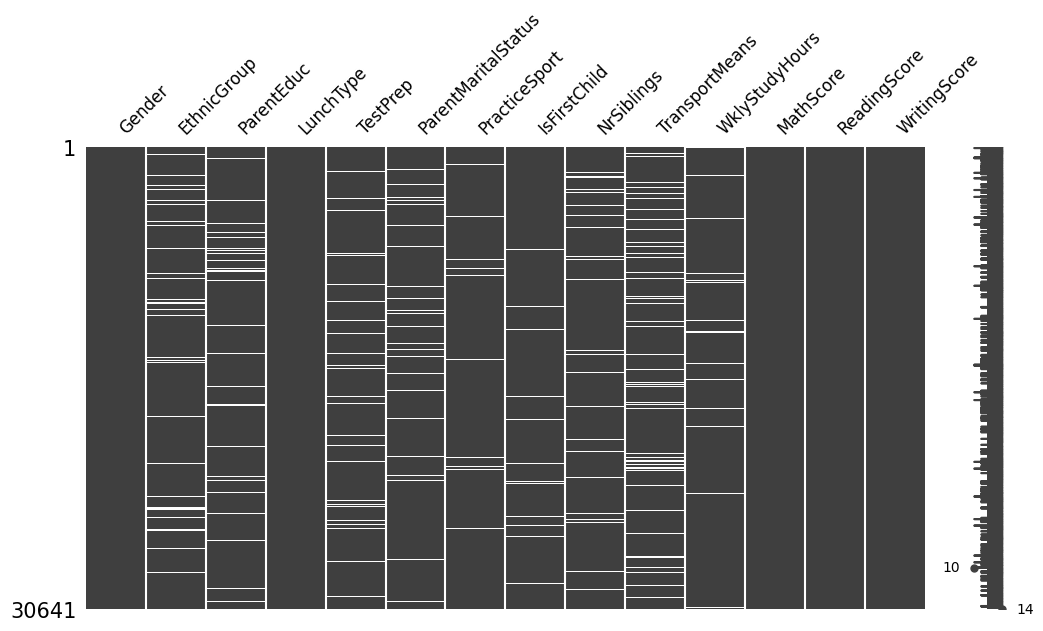

In [12]:
msno.matrix(data,
           figsize=(12, 6),
           fontsize=12)
plt.show()

In [13]:
data.isnull().sum().sort_values(ascending=False) #five columns with no missing values

TransportMeans         3134
ParentEduc             1845
EthnicGroup            1840
TestPrep               1830
NrSiblings             1572
ParentMaritalStatus    1190
WklyStudyHours          955
IsFirstChild            904
PracticeSport           631
Gender                    0
LunchType                 0
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [14]:
#percentage of missing values
missing = data.isnull().sum()
total = len(data)
missing_perc = round((missing/total) * 100,2)
missing_perc.sort_values(ascending=False)

TransportMeans         10.23
ParentEduc              6.02
EthnicGroup             6.01
TestPrep                5.97
NrSiblings              5.13
ParentMaritalStatus     3.88
WklyStudyHours          3.12
IsFirstChild            2.95
PracticeSport           2.06
Gender                  0.00
LunchType               0.00
MathScore               0.00
ReadingScore            0.00
WritingScore            0.00
dtype: float64

In [15]:
#Let's fill the missing values with the most common value in each column
data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))
data

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,< 5,71,71,74
1,female,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1,school_bus,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1,private,5 - 10,58,53,51
30638,female,group C,high school,free/reduced,completed,married,sometimes,no,1,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3,school_bus,5 - 10,82,90,93


In [16]:
#No more missing values
data.isnull().sum().sum()

0

# 3. Data Analysis & Data Visualization

## 1- Univariate Analysis

#### i. Gender

In [17]:
plt.figure(figsize=(7,6))
plot = sns.countplot(x=data['Gender'])
for p in plot.patches:
    
    plot.annotate(f"{p.get_height()}", (p.get_x() 
                                           + p.get_width() / 2, p.get_height()), 
                     ha="center", va="bottom", fontsize=9)

plt.title('Gender Distribution')

Text(0.5, 1.0, 'Gender Distribution')

* The number of male and females are roughly the same

In [18]:
data.groupby('Gender')[['ReadingScore', 'MathScore', 'WritingScore']].agg([np.mean, np.std, np.max, np.min])

ReadingScore                      MathScore                      \
               mean        std  max min       mean        std  max min   
Gender                                                                   
female    72.853216  14.267718  100  16  64.080654  15.238172  100   0   
male      65.854571  14.409589  100  10  69.069856  15.076223  100   7   

       WritingScore                      
               mean        std  max min  
Gender                                   
female    72.856457  14.660205  100  10  
male      63.920418  14.907079  100   4

In [19]:
#Alternate way of achieving the result above
pivot = pd.pivot_table(
    data, 
    values=['ReadingScore', 'MathScore', 'WritingScore'], 
    index='Gender', 
    #columns='City', 
    aggfunc={
        'ReadingScore': ['mean', 'max', 'min'],
        'MathScore': ['mean', 'max', 'min'],
        'WritingScore': ['mean', 'max', 'min']}
)

pd.DataFrame(pivot)

MathScore                ReadingScore                WritingScore  \
             max       mean min          max       mean min          max   
Gender                                                                     
female       100  64.080654   0          100  72.853216  16          100   
male         100  69.069856   7          100  65.854571  10          100   

                       
             mean min  
Gender                 
female  72.856457  10  
male    63.920418   4

#### Observation:
* Females only have low average scores in math compared to the rest of the scores in comparison to males.
* Minimum score for females is 0 while for males it is 4.
* Maximum score is 100 for both in all subjects.
* Females perform better in reading and writing and males perform better in math.
* Males perform pretty uniformly on all subjects compared to females who perform better at reading and writing.

In [20]:
data

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,< 5,71,71,74
1,female,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1,school_bus,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1,private,5 - 10,58,53,51
30638,female,group C,high school,free/reduced,completed,married,sometimes,no,1,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3,school_bus,5 - 10,82,90,93


#### ii. Score

In [21]:
plt.figure(figsize=(10,8))
sns.histplot(data[['ReadingScore', 'MathScore', 'WritingScore']], kde=True, bins=100)
plt.title('Distribution of the test scores')

Text(0.5, 1.0, 'Distribution of the test scores')

In [22]:
data[['ReadingScore', 'MathScore', 'WritingScore']].agg([np.mean, np.std, np.max, np.min])

,ReadingScore,MathScore,WritingScore
mean,69.377533,66.558402,68.418622
std,14.758952,15.361616,15.443525
max,100.000000,100.000000,100.000000
min,10.000000,0.000000,4.000000


* math is well,  *math*.

Let's define a function for efficiency's sake and because time is precious

In [23]:
def count_plot(df, col):
    '''
    Provided a df and a column, this function plots a countplot and marks the exact value on the bars
    
    '''
    
    plot = sns.countplot(data=df, x=col)
    for p in plot.patches:
        
        plot.annotate(f"{p.get_height()}", (p.get_x() 
                                           + p.get_width() / 2, p.get_height()), 
                     ha="center", va="bottom", fontsize=9)
    plt.title(f'{col} distribution')
    plt.xticks(rotation=90)
    plt.show()

#### iii. Ethnic Group

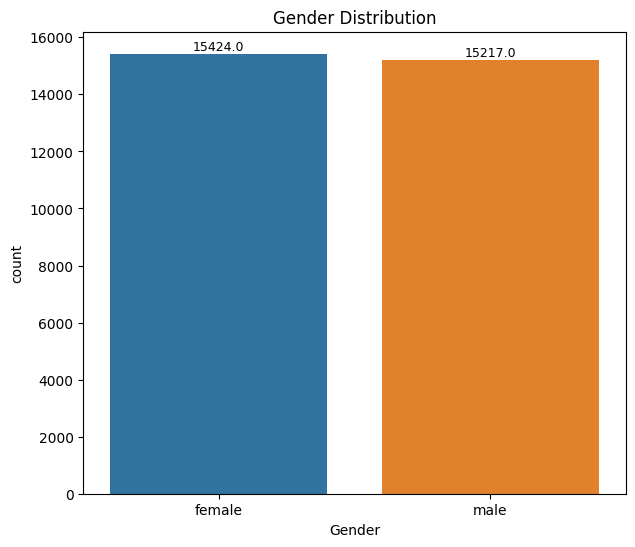

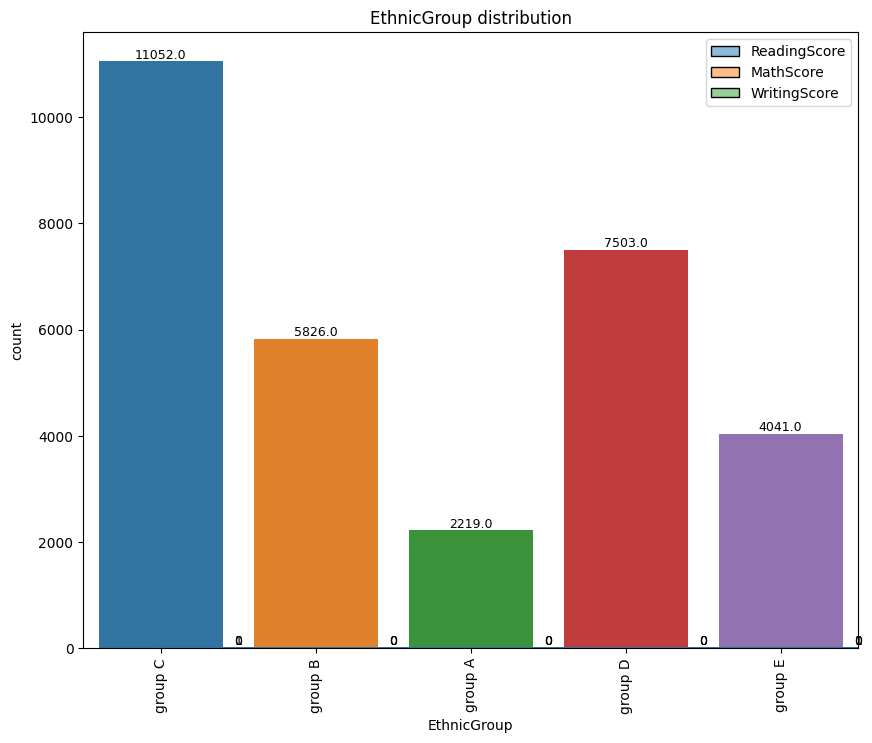

In [24]:
count_plot(data, "EthnicGroup")

#### iv. Parent(s) Education Level

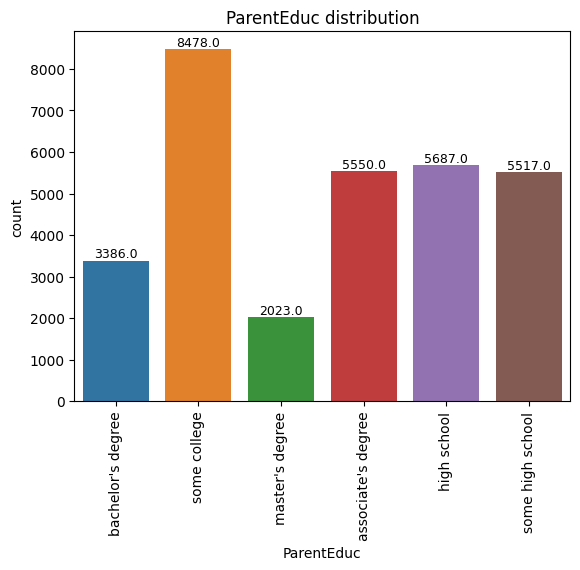

In [25]:
count_plot(data,'ParentEduc')

#### Observation:
* The least of them have a master's degree. 
* The most of them have done some college (dropped out of college) 
* General trend in between associate's degree, high school and some high school (dropped out of high school)

#### v. Type of Lunch

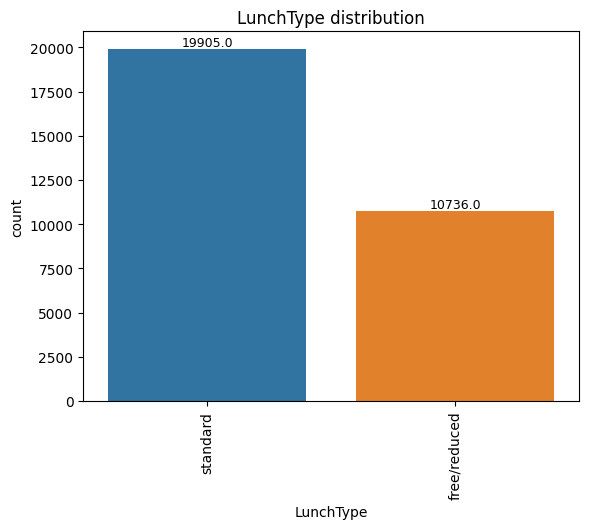

In [26]:
count_plot(data, 'LunchType')

* most students eat a standard lunch

#### vi. Parent Marital Status

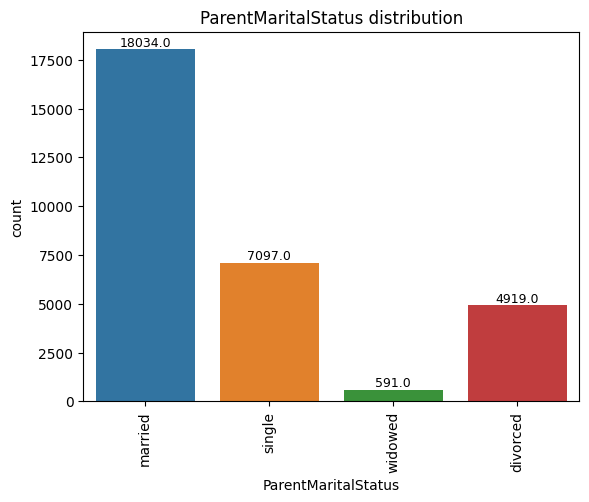

In [27]:
count_plot(data, 'ParentMaritalStatus')

#### Observation:
* Most students have married parents followed by single

#### vii. FIrst child or not?

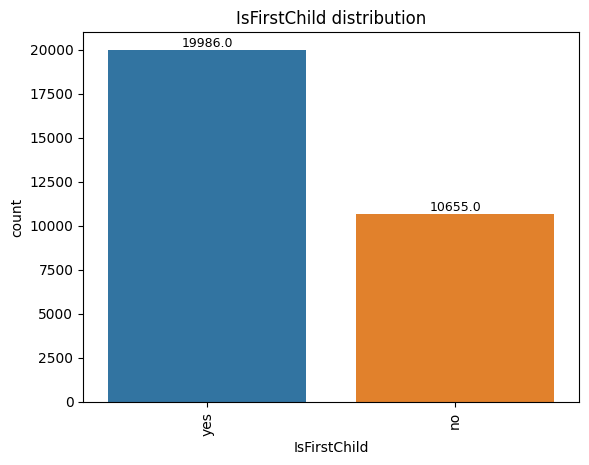

In [28]:
count_plot(data, 'IsFirstChild')

#### viii. Number of siblings

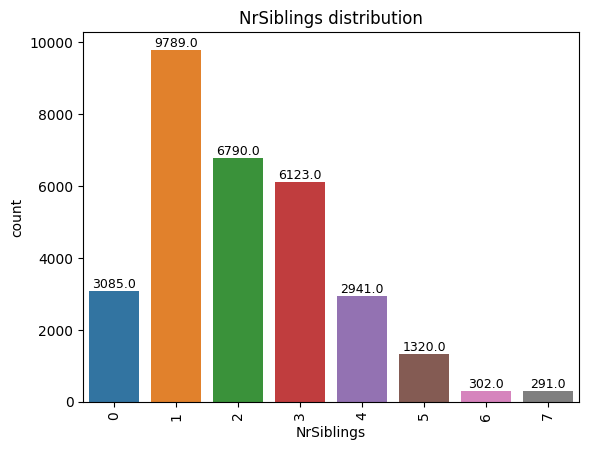

In [29]:
count_plot(data, 'NrSiblings')

#### ix. Weekly study hours

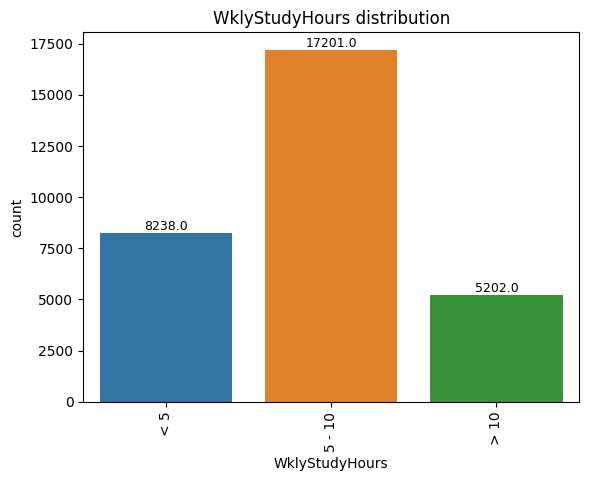

In [30]:
count_plot(data,'WklyStudyHours')

#### x. Means of transport

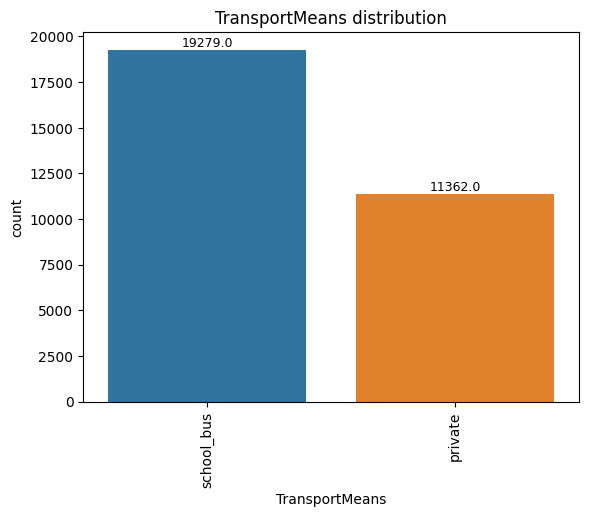

In [31]:
count_plot(data, 'TransportMeans')

## 2- Bivariate and Multivariate Analysis

#### Correlation between the numeric columns

In [32]:
num_cols = data[['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']]
corr = num_cols.corr()
corr

,NrSiblings,MathScore,ReadingScore,WritingScore
NrSiblings,1.000000,-0.000538,-0.000412,-0.001584
MathScore,-0.000538,1.000000,0.817825,0.807118
ReadingScore,-0.000412,0.817825,1.000000,0.952584
WritingScore,-0.001584,0.807118,0.952584,1.000000


#### Observation:
* number of siblings has nothing to do with scores
* students with high reading score are more likely to have a high writing score
* same cannot be said for math scores

Let's define a function for efficiency's sake and because time is precious.

In [33]:
def grouped_on_mathscore(df, col):
    """
    Demonstrates the affect of different features on each score type on average
    
    Given a dataframe and a column name, this function gives a summary of the mean scores (reading, math and writing) 
    with respect to each category in the given column in descending order of Math score. 
    after that it uses that new df and plots a barplot visualizing the results for easier understanding.
    
    """
    
    query = df.groupby([col])[['MathScore','ReadingScore', 'WritingScore']].\
    agg(np.mean).sort_values(by=['MathScore'], ascending=False)
                             
    df_long = query.reset_index().melt(id_vars=col, var_name='ScoreType', value_name='Score')
    
    plt.figure(figsize=(8, 6))
    graph = sns.barplot(data=df_long, x=col, y='Score', hue='ScoreType',palette='viridis')
    plt.title(f'Relationship/Affect of {col} on students score')
    plt.legend(title='Score Type',loc='lower right')
    plt.show()

    return display(query, graph)

#### Relationship between Students Score and Ethnic Group

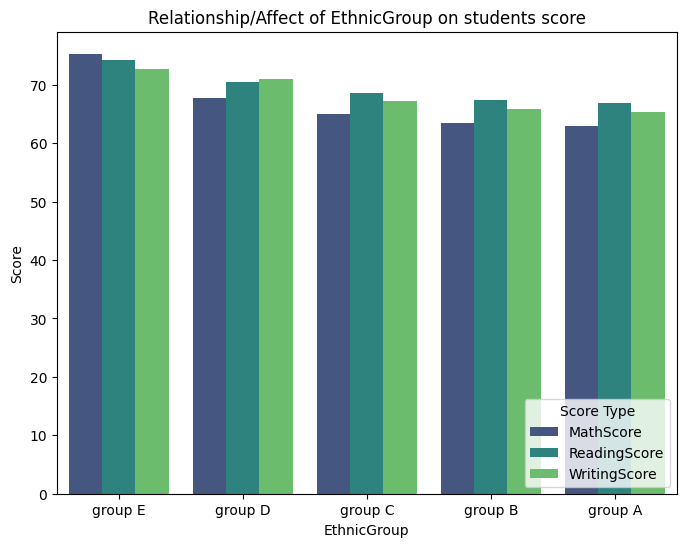

,MathScore,ReadingScore,WritingScore
EthnicGroup,,,
group E,75.298936,74.251423,72.677060
group D,67.666400,70.382247,70.890844
group C,64.943811,68.517734,67.149294
group B,63.490216,67.320460,65.895125
group A,62.991888,66.787742,65.251915


<Axes: title={'center': 'Relationship/Affect of EthnicGroup on students score'}, xlabel='EthnicGroup', ylabel='Score'>

In [34]:
grouped_on_mathscore(data,'EthnicGroup')

#### Observation:
* Group E consistently stands out from the rest of the ethnic groups and in all types of score that too
* Group E is the only group with their highest in math compared to the rest of the scores.

lets look a little more into this feature with resepect to other columns

<Figure size 1000x1000 with 0 Axes>

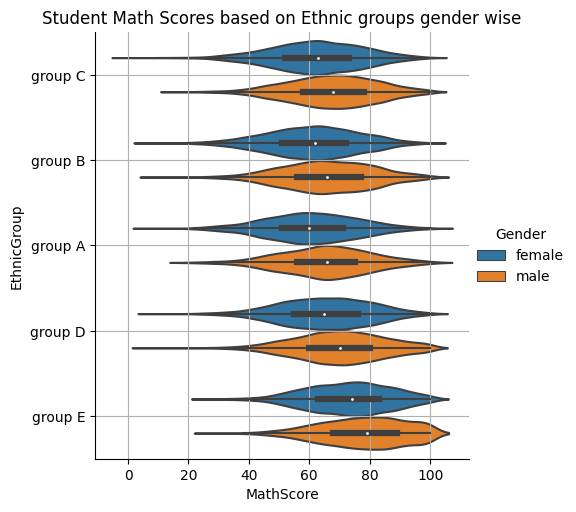

In [35]:
plt.figure(figsize=(10,10))
sns.catplot(data=data, y="EthnicGroup", x="MathScore", kind="violin", hue='Gender', pallete= 'viridis')
plt.title('Student Math Scores based on Ethnic groups gender wise')
plt.grid(True)
plt.show()

The only group with both the genders having almost equal math scores. Let's see if parent's education has anything to do with group E

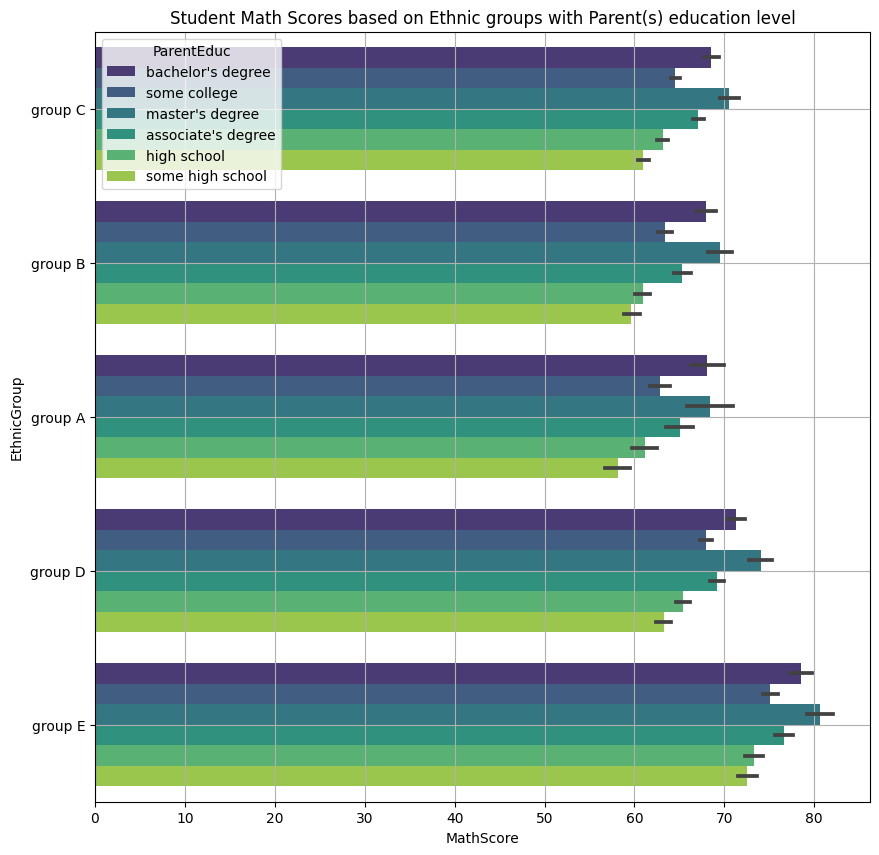

In [36]:
plt.figure(figsize=(10,10))
sns.barplot(data=data, y="EthnicGroup", x="MathScore", hue='ParentEduc',palette='viridis')
plt.title('Student Math Scores based on Ethnic groups with Parent(s) education level')
plt.grid(True)
plt.show()

It makes sense. Children with Parent(s) with masters and bachelors performed better than those parents that had other than them. and Group E is found to have the highest masters and bachelors holding parents compared to the rest of the groups.

#### Relationship between Students score and Parent(s) education level

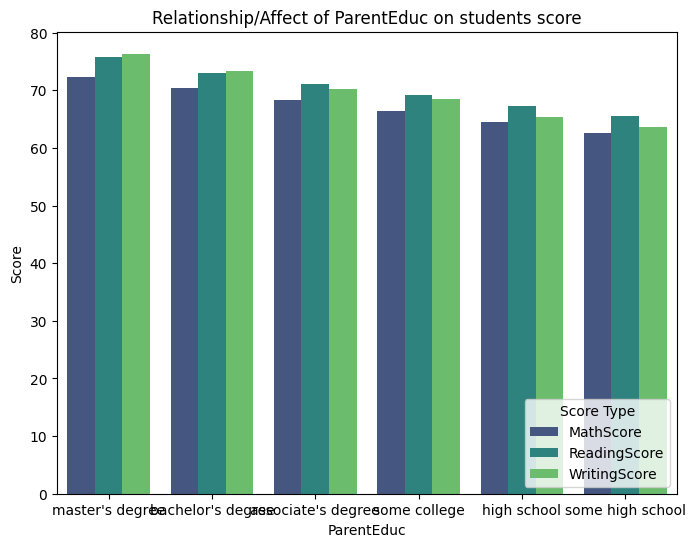

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
master's degree,72.336134,75.832921,76.356896
bachelor's degree,70.466627,73.062020,73.331069
associate's degree,68.365586,71.124324,70.299099
some college,66.445978,69.189667,68.456711
high school,64.435731,67.213997,65.421136
some high school,62.584013,65.510785,63.632409


<Axes: title={'center': 'Relationship/Affect of ParentEduc on students score'}, xlabel='ParentEduc', ylabel='Score'>

In [37]:
grouped_on_mathscore(data, 'ParentEduc')

#### Observation:
* As mentioned earlier, Students whose parents held a masters and a bachelors performed better than other levels of education 

#### Relationship between Lunch type and students score

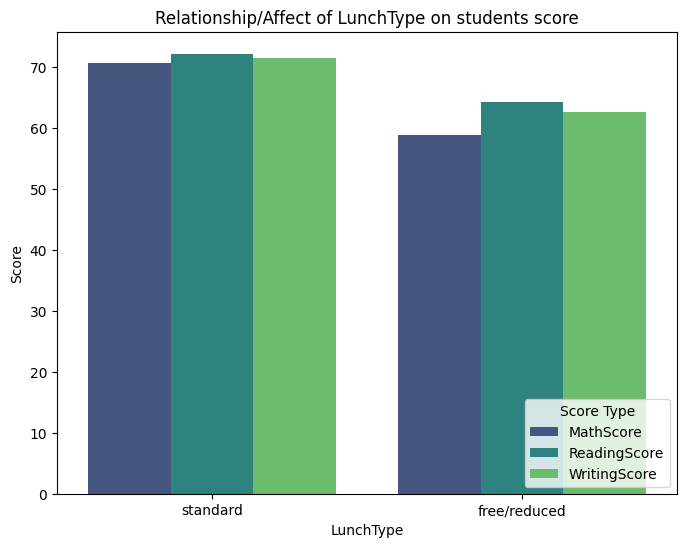

,MathScore,ReadingScore,WritingScore
LunchType,,,
standard,70.709370,72.175634,71.529716
free/reduced,58.862332,64.189735,62.650522


<Axes: title={'center': 'Relationship/Affect of LunchType on students score'}, xlabel='LunchType', ylabel='Score'>

In [38]:
grouped_on_mathscore(data, 'LunchType')

#### Observation:
* students that eat a standard lunch perform better than those that eat free/reduced 

#### Relationship between Test Preparation status and students score

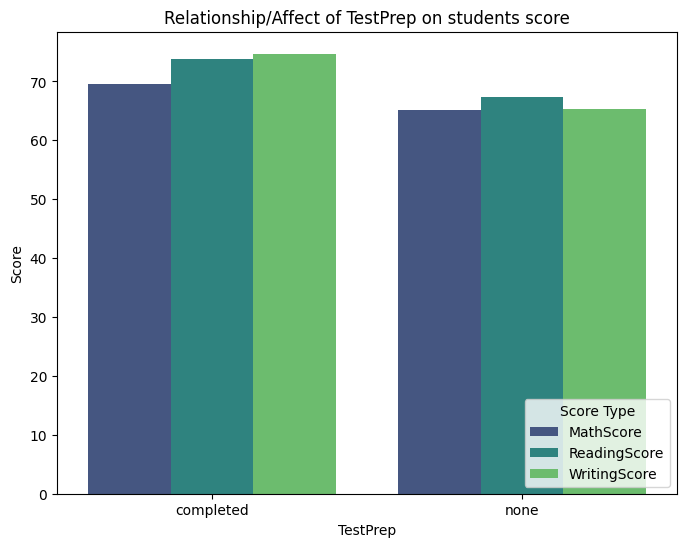

,MathScore,ReadingScore,WritingScore
TestPrep,,,
completed,69.546660,73.732998,74.703265
none,65.120323,67.281495,65.394180


<Axes: title={'center': 'Relationship/Affect of TestPrep on students score'}, xlabel='TestPrep', ylabel='Score'>

In [39]:
grouped_on_mathscore(data, 'TestPrep')

#### Observation:
* It's better to complete your test preparation for your exams. Especially, reading and writing exam.

Let's see if this factor and ethnic group have anything to do with one another.

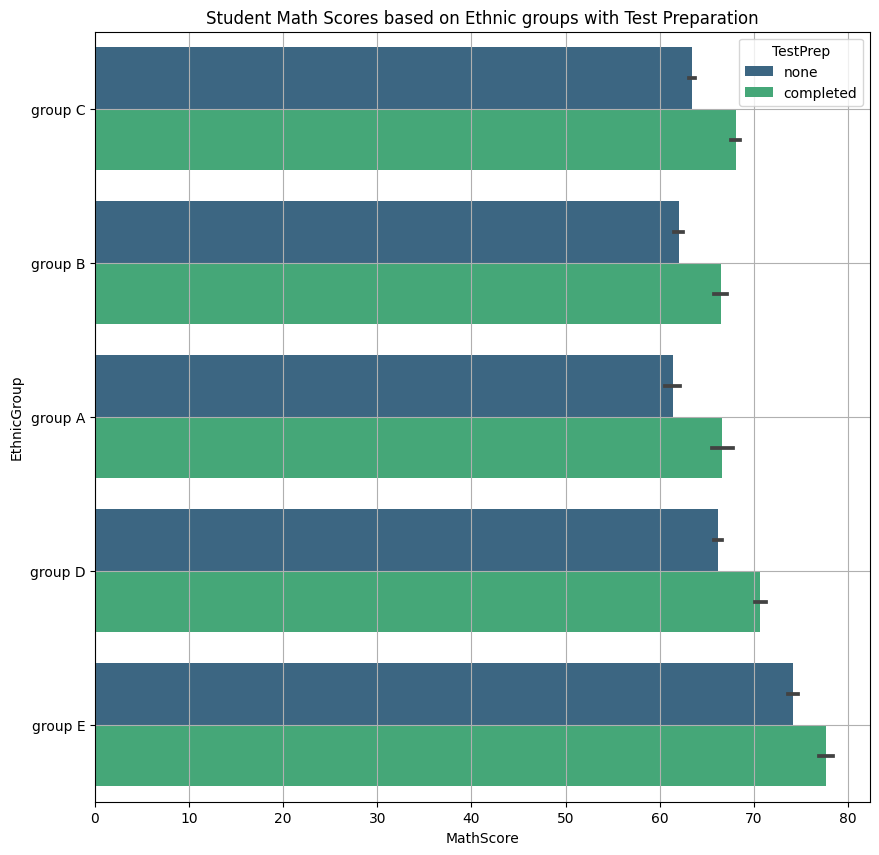

In [40]:
plt.figure(figsize=(10,10))
sns.barplot(data=data, y="EthnicGroup", x="MathScore", hue='TestPrep',palette='viridis')
plt.title('Student Math Scores based on Ethnic groups with Test Preparation')
plt.grid(True)
plt.show()

Understandably so, Group E is acing.

#### Relationship between Parent(s) marital status and students score

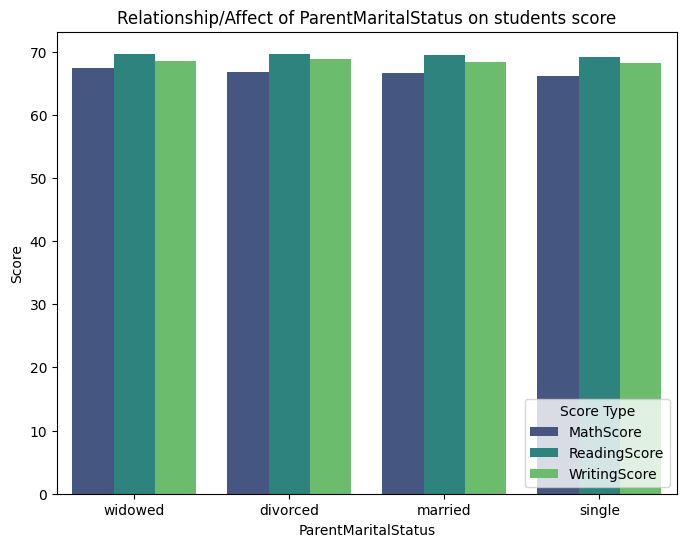

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
widowed,67.368866,69.651438,68.563452
divorced,66.691197,69.655011,68.799146
married,66.650161,69.379561,68.406177
single,66.165704,69.157250,68.174440


<Axes: title={'center': 'Relationship/Affect of ParentMaritalStatus on students score'}, xlabel='ParentMaritalStatus', ylabel='Score'>

In [41]:
grouped_on_mathscore(data, 'ParentMaritalStatus')

#### Observation:
* There is almost negligible difference in the students score with regards to this feature.

#### Relationship between Sports practice and students score

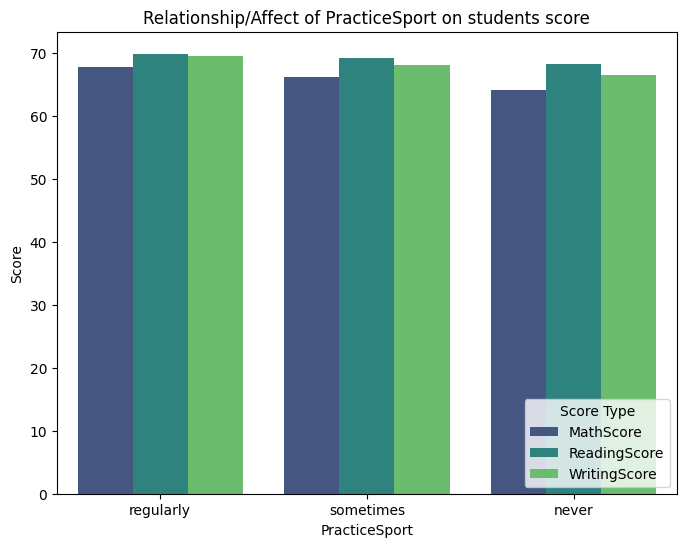

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
regularly,67.839155,69.943019,69.604003
sometimes,66.289258,69.255112,68.090255
never,64.171079,68.337662,66.522727


<Axes: title={'center': 'Relationship/Affect of PracticeSport on students score'}, xlabel='PracticeSport', ylabel='Score'>

In [42]:
grouped_on_mathscore(data, 'PracticeSport')

#### Observation:
* The moral of the story is to play sports atleast sometimes.

#### Relationship between Mean of transport and students score

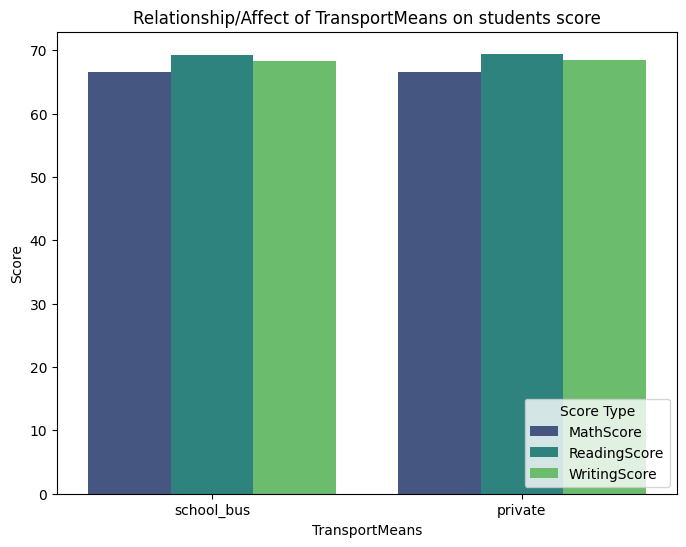

,MathScore,ReadingScore,WritingScore
TransportMeans,,,
school_bus,66.586130,69.321645,68.365009
private,66.511354,69.472364,68.509593


<Axes: title={'center': 'Relationship/Affect of TransportMeans on students score'}, xlabel='TransportMeans', ylabel='Score'>

In [43]:
grouped_on_mathscore(data, 'TransportMeans')

#### Observation:
* There is negligible difference in scores with regard to this feature

#### Relationship between if the child is the first chold or not and students score

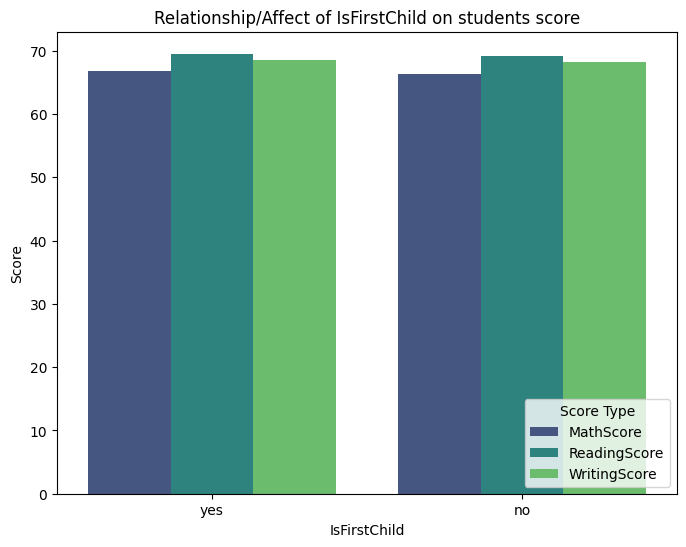

,MathScore,ReadingScore,WritingScore
IsFirstChild,,,
yes,66.724507,69.508106,68.529371
no,66.246832,69.132614,68.210887


<Axes: title={'center': 'Relationship/Affect of IsFirstChild on students score'}, xlabel='IsFirstChild', ylabel='Score'>

In [44]:
grouped_on_mathscore(data, 'IsFirstChild')

#### Observation:
* There is negligible difference with regards to this feature.

#### Relationship between weekly study hours and students score

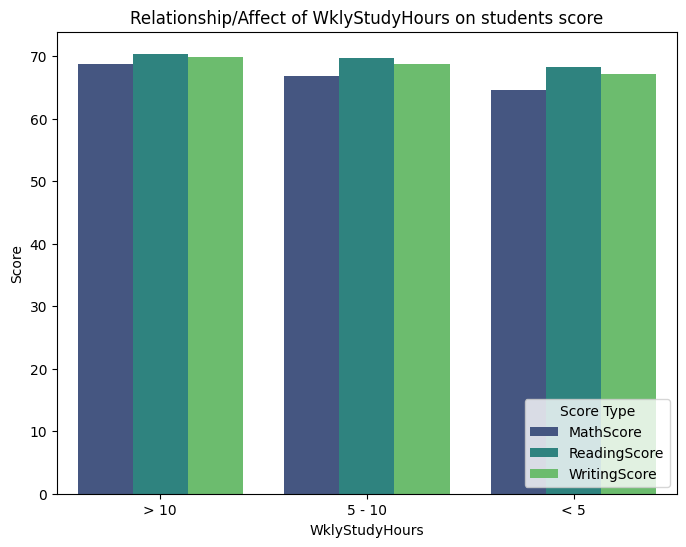

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
> 10,68.696655,70.365436,69.777778
5 - 10,66.859078,69.654148,68.643800
< 5,64.580359,68.176135,67.090192


<Axes: title={'center': 'Relationship/Affect of WklyStudyHours on students score'}, xlabel='WklyStudyHours', ylabel='Score'>

In [45]:
grouped_on_mathscore(data, 'WklyStudyHours')

#### Observation:
* I suppose myths were busted. According to this dataset, you're in the best position if you study in between 5 - 10 hours a week

# 4. Conclusion


According to this dataset, the factors that do affect the scores of students in mathematics, reading and writing are;
* Students with parents holding higher level education score better 
* Students that eat standard lunch perform better
* Students that complete their test preparation perform better
* Students that play sports occasionally perform better
* Students that study 5 - 10 hours a week perform better